# science fiction 

## tags

In [137]:
#https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede

import googlemaps, os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [149]:
users = pd.read_csv(os.path.join("data","scifi.stackexchange.com", "Users.csv"))
tags = pd.read_csv(os.path.join("data","scifi.stackexchange.com", "Tags.csv"))
posts = pd.read_csv(os.path.join("data","scifi.stackexchange.com", "Posts.csv"))

In [34]:
popular_tags = tags.sort_values("Count", ascending = False).head(16).reset_index(drop = True)
popular_tags

,Unnamed: 0,Count,ExcerptPostId,Id,TagName,WikiPostId
0,47,12565,1811.0,130,story-identification,1810.0
1,168,5694,2679.0,533,harry-potter,2678.0
2,21,5305,1970.0,44,star-wars,1969.0
3,2,4319,1776.0,10,star-trek,1775.0
4,225,3352,4872.0,695,marvel,4871.0
5,2251,2554,154468.0,5411,tolkiens-legendarium,154467.0
6,42,2403,3092.0,118,short-stories,3091.0
7,249,2008,4953.0,769,dc,4952.0
8,113,1759,2381.0,380,the-lord-of-the-rings,2380.0
9,991,1590,43198.0,2245,marvel-cinematic-universe,43197.0


In [14]:
tags.Count.sum()

114159

Każdy z 16 tagów powyżej stanowi co najmniej 1% wszystkich wystąpień (114159).

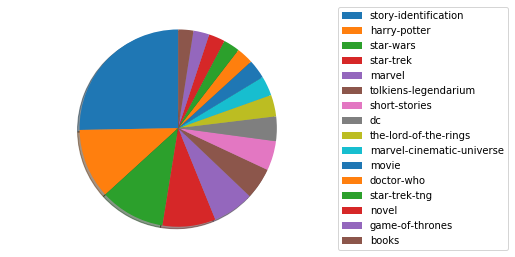

In [50]:
%matplotlib inline

patches, texts = plt.pie(popular_tags.Count, shadow=True, startangle=90)
plt.legend(patches, labels=popular_tags.TagName, bbox_to_anchor=(1.5,0.5), loc="center right")

plt.axis('equal')
plt.show()

In [70]:
popular_tags.Count.sum() * 100 / tags.Count.sum() # 43% 

43.505111292145166

In [75]:
popular_tags.shape[0] * 100 / tags.shape[0] # 0.5%

0.5538248528902735

Top 3 pytania z tagiem *story-identification*.

In [76]:
posts.head()

,Unnamed: 0,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
0,0,NaN,8.0,"<p>I've got <a href=""http://rads.stackoverflow...",2011-01-20T16:28:59.467,6,2011-01-11T20:54:27.723,2011-01-11T20:45:08.070,3.0,1,...,NaN,100.0,NaN,10.0,NaN,1,16,<novel><languages>,What science fiction novels have well develope...,2281.0
1,1,232.0,1.0,<p>In Lois McMaster Bujold's <em>Barrayar</em>...,NaN,2,NaN,2011-01-11T20:47:13.640,NaN,2,...,NaN,70236.0,NaN,27.0,NaN,1,18,<vorkosigan-saga>,What other celestial bodies are in Barrayar's ...,505.0
2,2,2775.0,1.0,<p>The plot of the TV series Total Recall 2070...,NaN,5,NaN,2011-01-11T20:49:52.980,4.0,3,...,NaN,770.0,NaN,35.0,NaN,1,20,<total-recall-2070>,"Other than Alpha and Delta, were there any oth...",487.0
3,3,NaN,NaN,<p>I guess that depends on your definition of ...,NaN,4,2011-01-11T20:54:27.723,2011-01-11T20:50:49.627,NaN,4,...,NaN,NaN,NaN,31.0,1.0,2,11,NaN,NaN,NaN
4,4,NaN,NaN,<p>I'm not sure of a book specifically that's ...,NaN,1,2011-01-11T20:54:27.723,2011-01-11T20:52:46.753,NaN,5,...,NaN,NaN,NaN,39.0,1.0,2,4,NaN,NaN,NaN


In [107]:
Tags_list = posts.Tags.str.split("><")

Tags_list = Tags_list.map(lambda x: [tag.replace("<", "").replace(">", "") for tag in x], na_action='ignore')
Tags_list.head()

sf_story_index = posts.loc[:,"Tags"].str.contains("story-identification").rename("story_identification")\
.reset_index().query("story_identification == True").loc[:,"index"]

Tags_story_identification = Tags_list.loc[sf_story_index]
posts.loc[sf_story_index,].query("PostTypeId == 1").sort_values("FavoriteCount", ascending = False).Title.head(3)

6138      Story where scientist communicates with cities...
127304    Story about humanity realizing they are in a s...
1756               Story where the number 3 is the monster?
Name: Title, dtype: object

In [108]:
posts.loc[sf_story_index,].query("PostTypeId == 1").sort_values("Score", ascending = False).Title.head(3)

# Story where the number 3 is the monster? - answered

1756              Story where the number 3 is the monster?
6138     Story where scientist communicates with cities...
30833    Boy transported to another planet where the be...
Name: Title, dtype: object

In [133]:
posts.loc[(posts["PostTypeId"] == 1) & np.isnan(posts["AcceptedAnswerId"]),:]\
.sort_values("FavoriteCount", ascending = False).Title.iloc[0]


'Story where scientist communicates with cities directly'

In [163]:
starwars_index = posts.loc[:,"Tags"].str.contains("star-wars").rename("starwars")\
.reset_index().query("starwars == True").loc[:,"index"]

In [150]:
posts.loc[:,"CreationDate"] = [datetime.strptime(x[0:10], '%Y-%m-%d') for x in posts.loc[:,"CreationDate"]]

In [153]:
starwars_posts_count = posts.loc[starwars_index,:]\
.groupby(pd.Grouper(key='CreationDate', freq='1M')).size() 

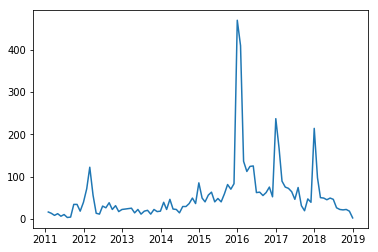

In [161]:
plt.plot(starwars_posts_count)
plt.show()


Coś widać :P jak wchodzą do kin, to więcej postów - nie zaskakujące, ale zawsze coś

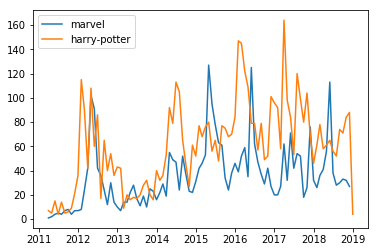

In [175]:
marvel_index = posts.loc[:,"Tags"].str.contains("marvel").rename("marvel")\
.reset_index().query("marvel == True").loc[:,"index"]

marvel_posts_count = posts.loc[marvel_index,:]\
.groupby(pd.Grouper(key='CreationDate', freq='1M')).size()

potter_index = posts.loc[:,"Tags"].str.contains("harry-potter").rename("potter")\
.reset_index().query("potter == True").loc[:,"index"]

potter_posts_count = posts.loc[potter_index,:]\
.groupby(pd.Grouper(key='CreationDate', freq='1M')).size()

startrek_index = posts.loc[:,"Tags"].str.contains("star-trek").rename("startrek")\
.reset_index().query("startrek == True").loc[:,"index"]

startrek_posts_count = posts.loc[startrek_index,:]\
.groupby(pd.Grouper(key='CreationDate', freq='1M')).size()

#plt.plot(starwars_posts_count, label = "star-wars")
#plt.plot(startrek_posts_count, label = "star-trek")
plt.plot(marvel_posts_count, label = "marvel")
plt.plot(potter_posts_count, label = "harry-potter")

plt.legend()
plt.show()

no chyba nic ciekawego nie wynika;  
można odkomentować wyżej pozostałe linie